In [1]:
# import all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset
df_train = pd.read_csv('Sentiment6.csv')

In [3]:
# records of the dataframe
df_train

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...
5995,B002HMCLFQ,"[1, 2]",4,"As I read this, I found myself trying to guess...","04 1, 2010",A3IF9GAIGNVBMZ,"George Angus ""Tumblemoose""",Crazy fun,1270080000
5996,B002HMCLFQ,"[5, 6]",5,"If you like a good action/thriller, certainly ...","02 4, 2011",A2NXSAC8H7YKI3,JDullens,"You'll like it, unless you're some kind of par...",1296777600
5997,B002HMCLFQ,"[0, 0]",4,This was a different read for me. For the mos...,"07 17, 2013",A335AIY6JYXZ6V,Kathy Gisi,Crack up,1374019200
5998,B002HMCLFQ,"[3, 4]",5,Argus Ward's struggle to separate reality from...,"09 29, 2009",A27B2D6STG2Q6H,KayeKaye,"Very, very good!",1254182400


In [4]:
# data type of each feature
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asin            6000 non-null   object
 1   helpful         6000 non-null   object
 2   overall         6000 non-null   int64 
 3   reviewText      6000 non-null   object
 4   reviewTime      6000 non-null   object
 5   reviewerID      6000 non-null   object
 6   reviewerName    6000 non-null   object
 7   summary         6000 non-null   object
 8   unixReviewTime  6000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 422.0+ KB


## Exploratory Data Analysis and Visualization

In [5]:
# value counts of 'asin' feature
df_train['asin'].value_counts()

B002AJ7X2C    111
B000JMLBHU    108
B002D48NBO     99
B001V9KG4E     77
B001HQHCBQ     74
             ... 
B001D6468M      5
B000TU16PE      5
B000JMLG4S      5
B002BH4RT0      5
B0029ZBK5S      5
Name: asin, Length: 494, dtype: int64

<AxesSubplot:xlabel='asin'>

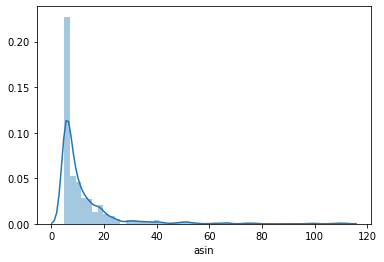

In [6]:
# distplot of 'asin' feature
sns.distplot(df_train['asin'].value_counts())

- From the above distribution plot we can say that 0 to 50 repeated 'asin' values are more means it is approximately 70% and the remaining values are less

- 'helpful' column means that out of members in list how many are reported the reviews on that pertucular date

- I thought that 'helpful' colunmn will not contribute any participation in accurate model building

- From the above explaination we can eliminate 'helpfull' column

In [7]:
# value count of 'overall' feature
df_train['overall'].value_counts()

5    2830
4    1732
3     829
2     354
1     255
Name: overall, dtype: int64

In [8]:
# normalize 'overall' feature
df_train['overall'].value_counts(normalize=True)

5    0.471667
4    0.288667
3    0.138167
2    0.059000
1    0.042500
Name: overall, dtype: float64

<AxesSubplot:>

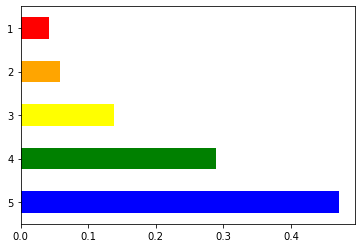

In [9]:
# Bar plot of 'overall' feature
df_train['overall'].value_counts(normalize=True).plot(kind='barh',color=['blue','green','yellow','orange','red'])

In [10]:
# import datime library
from datetime import datetime

In [11]:
# extracting 'Date' from 'reviewTime' feature
df_train['Date'] = pd.to_datetime(df_train['reviewTime']).dt.date

In [12]:
# records of dataframe
df_train

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Date
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014-05-05
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2014-01-06
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2014-04-04
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014-02-19
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014-03-19
...,...,...,...,...,...,...,...,...,...,...
5995,B002HMCLFQ,"[1, 2]",4,"As I read this, I found myself trying to guess...","04 1, 2010",A3IF9GAIGNVBMZ,"George Angus ""Tumblemoose""",Crazy fun,1270080000,2010-04-01
5996,B002HMCLFQ,"[5, 6]",5,"If you like a good action/thriller, certainly ...","02 4, 2011",A2NXSAC8H7YKI3,JDullens,"You'll like it, unless you're some kind of par...",1296777600,2011-02-04
5997,B002HMCLFQ,"[0, 0]",4,This was a different read for me. For the mos...,"07 17, 2013",A335AIY6JYXZ6V,Kathy Gisi,Crack up,1374019200,2013-07-17
5998,B002HMCLFQ,"[3, 4]",5,Argus Ward's struggle to separate reality from...,"09 29, 2009",A27B2D6STG2Q6H,KayeKaye,"Very, very good!",1254182400,2009-09-29


In [13]:
# extracting the 'month' from 'Date' feature
df_train['month'] = pd.to_datetime(df_train['Date'], format='%Y/%m/%d').dt.month

In [14]:
# distribution of 'month'
df_train['month']

0       5
1       1
2       4
3       2
4       3
       ..
5995    4
5996    2
5997    7
5998    9
5999    8
Name: month, Length: 6000, dtype: int64

In [15]:
# extractinf 'day' from 'Date' feature 
df_train['day'] = pd.to_datetime(df_train['Date'], format='%Y/%m/%d').dt.day

In [16]:
# Distribution of 'day' feature
df_train['day']

0        5
1        6
2        4
3       19
4       19
        ..
5995     1
5996     4
5997    17
5998    29
5999    11
Name: day, Length: 6000, dtype: int64

In [17]:
# extracting the 'year' feature from 'Date' feature
df_train['year'] = pd.to_datetime(df_train['Date'], format='%Y/%m/%d').dt.year

In [18]:
# distribution of the 'year' feature
df_train['year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
5995    2010
5996    2011
5997    2013
5998    2009
5999    2009
Name: year, Length: 6000, dtype: int64

In [19]:
# all records of dataframe df_train
df_train

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Date,month,day,year
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014-05-05,5,5,2014
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2014-01-06,1,6,2014
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2014-04-04,4,4,2014
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014-02-19,2,19,2014
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014-03-19,3,19,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,B002HMCLFQ,"[1, 2]",4,"As I read this, I found myself trying to guess...","04 1, 2010",A3IF9GAIGNVBMZ,"George Angus ""Tumblemoose""",Crazy fun,1270080000,2010-04-01,4,1,2010
5996,B002HMCLFQ,"[5, 6]",5,"If you like a good action/thriller, certainly ...","02 4, 2011",A2NXSAC8H7YKI3,JDullens,"You'll like it, unless you're some kind of par...",1296777600,2011-02-04,2,4,2011
5997,B002HMCLFQ,"[0, 0]",4,This was a different read for me. For the mos...,"07 17, 2013",A335AIY6JYXZ6V,Kathy Gisi,Crack up,1374019200,2013-07-17,7,17,2013
5998,B002HMCLFQ,"[3, 4]",5,Argus Ward's struggle to separate reality from...,"09 29, 2009",A27B2D6STG2Q6H,KayeKaye,"Very, very good!",1254182400,2009-09-29,9,29,2009


In [20]:
# description of 'overall' feature
df_train['overall'].describe()

count    6000.000000
mean        4.088000
std         1.104895
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: overall, dtype: float64

In [21]:
df_train['Date'].value_counts()

2013-02-18    22
2013-05-19    20
2013-02-13    16
2013-02-28    16
2012-09-06    15
              ..
2008-02-16     1
2009-10-01     1
2008-12-18     1
2008-02-13     1
2008-10-26     1
Name: Date, Length: 1787, dtype: int64

In [22]:
# top 15 of 'Date' feature
df_train['Date'].value_counts()[:15]

2013-02-18    22
2013-05-19    20
2013-02-13    16
2013-02-28    16
2012-09-06    15
2012-12-05    15
2013-02-21    14
2014-01-12    13
2013-05-29    13
2014-03-30    13
2014-03-19    12
2012-12-20    12
2013-12-28    12
2013-02-25    12
2013-01-04    12
Name: Date, dtype: int64

In [23]:
#value counts of 'Date' feature
df_train['Date'].value_counts(ascending=True)

2008-10-26     1
2008-02-13     1
2008-12-18     1
2009-10-01     1
2008-02-16     1
              ..
2012-09-06    15
2013-02-28    16
2013-02-13    16
2013-05-19    20
2013-02-18    22
Name: Date, Length: 1787, dtype: int64

In [24]:
# making the ascending order of 'Date' feature
df_train['Date'].value_counts(ascending=True)[:25]

2008-10-26    1
2008-02-13    1
2008-12-18    1
2009-10-01    1
2008-02-16    1
2012-08-04    1
2011-05-26    1
2010-12-19    1
2009-11-17    1
2010-11-12    1
2010-03-18    1
2010-11-26    1
2008-08-31    1
2011-07-17    1
2012-06-02    1
2011-03-14    1
2010-03-10    1
2010-12-01    1
2010-11-03    1
2008-05-04    1
2011-02-16    1
2009-01-07    1
2009-06-04    1
2012-11-03    1
2009-12-04    1
Name: Date, dtype: int64

<AxesSubplot:>

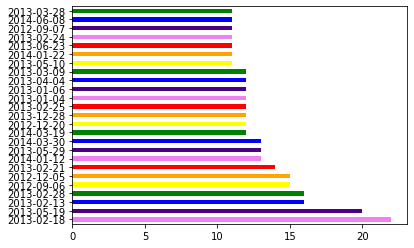

In [25]:
#Bar plot of 'Date' feature
df_train['Date'].value_counts()[:25].plot(kind='barh',color=['violet','indigo','blue','green','yellow','orange','red'])

- on 07-07-2014 more reviews are send 

<AxesSubplot:xlabel='Date'>

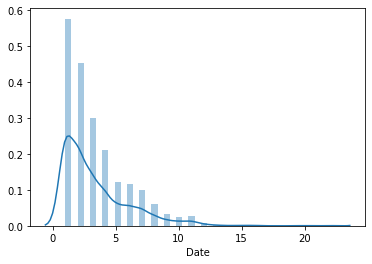

In [26]:
# Distribution plot of 'Date' feature
sns.distplot(df_train['Date'].value_counts())

- 100 count values are distributed above 0.5% more remaining are are very less

In [27]:
# value conts of 'year' feature
df_train['year'].value_counts()

2013    2086
2012    1093
2014     984
2011     715
2010     589
2009     375
2008     135
2007      15
2006       3
2005       2
2002       1
2001       1
2000       1
Name: year, dtype: int64

- reviews from 2002 to 2014 are present in our dataset, when years are increasing text messages over phones are increasing

- From the above we can conclude that nuber of usage of phones are increasing very rapidly which means that phone sales are increasing rapidly

In [28]:
# normalization value counts of 'year' feature
df_train['year'].value_counts(normalize=True)

2013    0.347667
2012    0.182167
2014    0.164000
2011    0.119167
2010    0.098167
2009    0.062500
2008    0.022500
2007    0.002500
2006    0.000500
2005    0.000333
2002    0.000167
2001    0.000167
2000    0.000167
Name: year, dtype: float64

<AxesSubplot:>

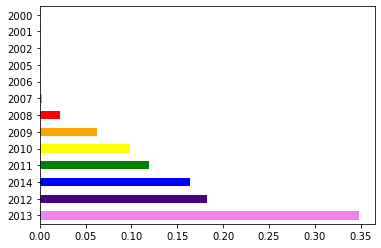

In [29]:
# bar plot of 'year' feature 
df_train['year'].value_counts(normalize=True).plot(kind='barh',color=['violet','indigo','blue','green','yellow','orange','red'])

- From the above plot we can say that smart phones usage since 2010 to 2014 are increased rapidly from this smart phone sales are incresed like wise

In [30]:
# value counts of 'month' feature
df_train['month'].value_counts()

3     624
1     623
2     619
5     605
4     543
6     532
12    460
7     447
11    403
9     395
10    376
8     373
Name: month, dtype: int64

In [31]:
# narmalization of value counts of 'month' feature
df_train['month'].value_counts(normalize=True)

3     0.104000
1     0.103833
2     0.103167
5     0.100833
4     0.090500
6     0.088667
12    0.076667
7     0.074500
11    0.067167
9     0.065833
10    0.062667
8     0.062167
Name: month, dtype: float64

<AxesSubplot:>

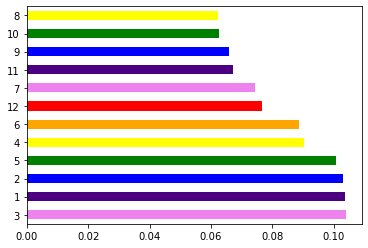

In [32]:
# bar plot of 'month' feature
df_train['month'].value_counts(normalize=True).plot(kind='barh',color=['violet','indigo','blue','green','yellow','orange','red'])

- From the above plot we can observed here is that most of the sales completely depends on crops which means that from 8th month onwards slitly formers income increases to 6th month so we can conclude that total sales are increasing like wise

In [33]:
# value counts of 'day' feature
df_train['day'].value_counts()

26    229
6     228
19    220
5     219
4     216
23    213
21    212
1     211
11    209
10    207
7     207
9     201
13    201
2     199
18    198
12    197
22    196
20    196
16    191
17    190
27    189
29    187
15    184
24    182
28    180
8     177
14    176
25    163
30    161
3     157
31    104
Name: day, dtype: int64

In [34]:
# normalization value counts of 'day' feature
df_train['day'].value_counts(normalize=True)

26    0.038167
6     0.038000
19    0.036667
5     0.036500
4     0.036000
23    0.035500
21    0.035333
1     0.035167
11    0.034833
10    0.034500
7     0.034500
9     0.033500
13    0.033500
2     0.033167
18    0.033000
12    0.032833
22    0.032667
20    0.032667
16    0.031833
17    0.031667
27    0.031500
29    0.031167
15    0.030667
24    0.030333
28    0.030000
8     0.029500
14    0.029333
25    0.027167
30    0.026833
3     0.026167
31    0.017333
Name: day, dtype: float64

<AxesSubplot:>

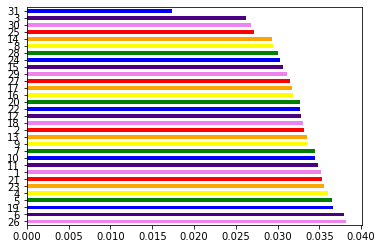

In [35]:
# bar plot of 'day' feature
df_train['day'].value_counts(normalize=True).plot(kind='barh',color=['violet','indigo','blue','green','yellow','orange','red'])

- From 1st to 20th sales are increasing maximum is the 20th day of the month but from 20th to 31st sales are decreasing

- This is completly participation of employees was observed

In [36]:
# Adding 'reviewText' and 'summary'
df_train["text"] = df_train["reviewText"] + df_train["summary"]

In [37]:
# first record of 'text' feature
df_train['text'][0]

"I enjoy vintage books and movies so I enjoyed reading this book.  The plot was unusual.  Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me.Nice vintage story"

In [38]:
# first record of 'reviewText'
df_train['reviewText'][0]

"I enjoy vintage books and movies so I enjoyed reading this book.  The plot was unusual.  Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me."

In [39]:
# For cleaning the data
df_train['text'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [40]:
# all records of 'text' feature
df_train['text']

0       I enjoy vintage books and movies so I enjoyed ...
1       This book is a reissue of an old one  the auth...
2       This was a fairly interesting read   It had ol...
3       I d never read any of the Amy Brewster mysteri...
4       If you like period pieces   clothing  lingo  y...
                              ...                        
5995    As I read this  I found myself trying to guess...
5996    If you like a good action thriller  certainly ...
5997    This was a different read for me   For the mos...
5998    Argus Ward s struggle to separate reality from...
5999    I saw a really enthusiastic review    stars  f...
Name: text, Length: 6000, dtype: object

In [41]:
# all records string and lower
df_train['text'].str.lower()

0       i enjoy vintage books and movies so i enjoyed ...
1       this book is a reissue of an old one  the auth...
2       this was a fairly interesting read   it had ol...
3       i d never read any of the amy brewster mysteri...
4       if you like period pieces   clothing  lingo  y...
                              ...                        
5995    as i read this  i found myself trying to guess...
5996    if you like a good action thriller  certainly ...
5997    this was a different read for me   for the mos...
5998    argus ward s struggle to separate reality from...
5999    i saw a really enthusiastic review    stars  f...
Name: text, Length: 6000, dtype: object

In [42]:
# first record of 'text' feature
df_train['text'].str.lower()[0]

'i enjoy vintage books and movies so i enjoyed reading this book   the plot was unusual   don t think killing someone in self defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today still it was a good read for me nice vintage story'

In [43]:
# train_text dataframe
train_text = df_train['text'].str.lower()

In [44]:
# all records of train_text dataframe
train_text

0       i enjoy vintage books and movies so i enjoyed ...
1       this book is a reissue of an old one  the auth...
2       this was a fairly interesting read   it had ol...
3       i d never read any of the amy brewster mysteri...
4       if you like period pieces   clothing  lingo  y...
                              ...                        
5995    as i read this  i found myself trying to guess...
5996    if you like a good action thriller  certainly ...
5997    this was a different read for me   for the mos...
5998    argus ward s struggle to separate reality from...
5999    i saw a really enthusiastic review    stars  f...
Name: text, Length: 6000, dtype: object

In [45]:
# first record of train_text dataframe
train_text[0]

'i enjoy vintage books and movies so i enjoyed reading this book   the plot was unusual   don t think killing someone in self defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today still it was a good read for me nice vintage story'

In [46]:
# 'overall' feature unique values
df_train['overall'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [47]:
# replacing all values less than 4 with 0
df_train['overall'] = np.where(df_train['overall'] <= 4 , 0, df_train['overall'])

In [48]:
# replacing all values greater than 4 with 1
df_train['overall'] = np.where(df_train['overall'] > 4 , 1, df_train['overall'])

In [49]:
#value counts of 'overall' feature
df_train['overall'].value_counts()

0    3170
1    2830
Name: overall, dtype: int64

<AxesSubplot:>

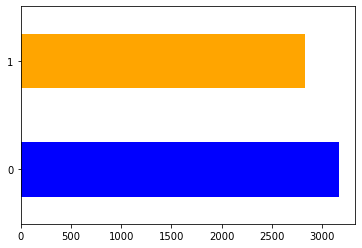

In [50]:
#Bar plot of 'overall' feature
df_train['overall'].value_counts().plot(kind='barh',color=['blue','orange'])

In [51]:
# normalization overall count of 'overall' feature
df_train['overall'].value_counts(normalize=True)

0    0.528333
1    0.471667
Name: overall, dtype: float64

## We have to do similar operations with test dataset also

In [52]:
# load the test dataset
df_test = pd.read_csv('df_test6.csv',index_col=0)

In [53]:
# adding both 'reviewText' and 'summary'
df_test["text"] = df_train["reviewText"] + df_test["summary"]

In [54]:
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [55]:
# For cleaning the data
df_test['text'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [56]:
# all records of test data
df_test['text']

0       I enjoy vintage books and movies so I enjoyed ...
1       This book is a reissue of an old one  the auth...
2       This was a fairly interesting read   It had ol...
3       I d never read any of the Amy Brewster mysteri...
4       If you like period pieces   clothing  lingo  y...
                              ...                        
5995    As I read this  I found myself trying to guess...
5996    If you like a good action thriller  certainly ...
5997    This was a different read for me   For the mos...
5998    Argus Ward s struggle to separate reality from...
5999    I saw a really enthusiastic review    stars  f...
Name: text, Length: 6000, dtype: object

In [57]:
# sting and lowering the test dataset
test_text = df_test['text'].str.lower()

In [58]:
# all the records of test dataset
test_text

0       i enjoy vintage books and movies so i enjoyed ...
1       this book is a reissue of an old one  the auth...
2       this was a fairly interesting read   it had ol...
3       i d never read any of the amy brewster mysteri...
4       if you like period pieces   clothing  lingo  y...
                              ...                        
5995    as i read this  i found myself trying to guess...
5996    if you like a good action thriller  certainly ...
5997    this was a different read for me   for the mos...
5998    argus ward s struggle to separate reality from...
5999    i saw a really enthusiastic review    stars  f...
Name: text, Length: 6000, dtype: object

In [59]:
# first record of test dataset
test_text[0]

'i enjoy vintage books and movies so i enjoyed reading this book   the plot was unusual   don t think killing someone in self defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today still it was a good read for me nine ten'

In [60]:
# value counts of 'overall' feature
df_test['overall'].value_counts()

5    3711
4    1506
3     518
2     162
1     103
Name: overall, dtype: int64

<AxesSubplot:>

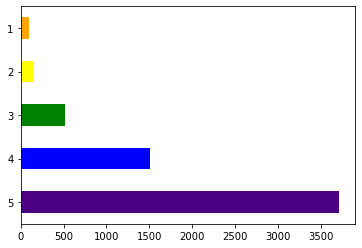

In [61]:
# barplot of 'overall' feature
df_test['overall'].value_counts().plot(kind='barh',color=['indigo','blue','green','yellow','orange','red'])

In [62]:
# replacing the values less than 4 with 0
df_test['overall'] = np.where(df_test['overall'] <= 4 , 0, df_test['overall'])

In [63]:
# replacing the values greater than 4 with 1
df_test['overall'] = np.where(df_test['overall'] > 4 , 1, df_test['overall'])

In [64]:
# value counts of 'overall' feature
df_test['overall'].value_counts()

1    3711
0    2289
Name: overall, dtype: int64

In [65]:
# normalize value counts of 'overall' feature
df_test['overall'].value_counts(normalize=True)

1    0.6185
0    0.3815
Name: overall, dtype: float64

<AxesSubplot:>

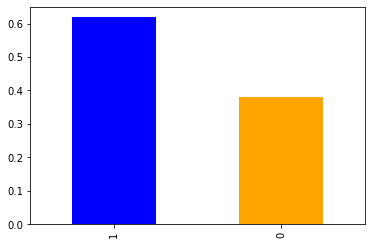

In [66]:
# bar plot of 'overall' feature
df_test['overall'].value_counts(normalize=True).plot(kind='bar',color=['blue','orange'])

## Converting the Text data into vetorization format

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
cv.fit(train_text)
train_numb = cv.transform(train_text)
test_numb = cv.transform(test_text)

In [68]:
train_numb

<6000x21854 sparse matrix of type '<class 'numpy.int64'>'
	with 410829 stored elements in Compressed Sparse Row format>

In [69]:
# value counts of 'overall' feature
df_train['overall'].value_counts()

0    3170
1    2830
Name: overall, dtype: int64

In [70]:
test_numb

<6000x21854 sparse matrix of type '<class 'numpy.int64'>'
	with 415695 stored elements in Compressed Sparse Row format>

In [71]:
# divide the dataset into training and validation 
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_numb,df_train['overall'],test_size=0.30)

In [72]:
X_train

<4200x21854 sparse matrix of type '<class 'numpy.int64'>'
	with 289453 stored elements in Compressed Sparse Row format>

In [73]:
# Building a Logistic model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
for c in [0.01,0.05,0.25,0.5,1]:
    lr = LogisticRegression(C=c,solver='liblinear')
    lr.fit(X_train,y_train)
    print('Accuracy for C=%s:%s'%(c,accuracy_score(y_val,lr.predict(X_val))))

Accuracy for C=0.01:0.7472222222222222
Accuracy for C=0.05:0.7461111111111111
Accuracy for C=0.25:0.7333333333333333
Accuracy for C=0.5:0.7277777777777777
Accuracy for C=1:0.7222222222222222


In [74]:
# second record of test_text
test_text[1]

'this book is a reissue of an old one  the author was born in       it s of the era of  say  nero wolfe  the introduction was quite interesting  explaining who the author was and why he s been forgotten  i d never heard of him the language is a little dated at times  like calling a gun a      heater        i also made good use of my fire s dictionary to look up words like      deshabille      and      canarsie       still  it was well worth a look see can t beat a willow rose book   '

In [75]:
# Confusion matrix
cm = confusion_matrix(y_val,lr.predict(X_val))
cl = classification_report(y_val,lr.predict(X_val))
print(cm)
print(cl)

[[727 251]
 [249 573]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       978
           1       0.70      0.70      0.70       822

    accuracy                           0.72      1800
   macro avg       0.72      0.72      0.72      1800
weighted avg       0.72      0.72      0.72      1800



In [76]:
# building multinomial Naivie bayes
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train,y_train)
y_pred = mn.predict(X_val)
acc = accuracy_score(y_pred,y_val)
cm = confusion_matrix(y_pred,y_val)
clr = classification_report(y_pred,y_val)
print(acc)
print(cm)
print(clr)

0.745
[[756 237]
 [222 585]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       993
           1       0.71      0.72      0.72       807

    accuracy                           0.74      1800
   macro avg       0.74      0.74      0.74      1800
weighted avg       0.75      0.74      0.75      1800



In [77]:
# build xgboost classifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_val)
acc = accuracy_score(y_pred,y_val)
cm = confusion_matrix(y_pred,y_val)
clr = classification_report(y_pred,y_val)
print(acc)
print(cm)
print(clr)

[16:07:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7305555555555555
[[727 234]
 [251 588]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       961
           1       0.72      0.70      0.71       839

    accuracy                           0.73      1800
   macro avg       0.73      0.73      0.73      1800
weighted avg       0.73      0.73      0.73      1800

